In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
plt.style.use('seaborn')

() ()
(300,) (300,)


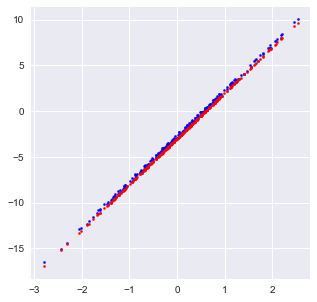

In [2]:
N  = 300    # the number of DATA
lr = 0.01   # Learning RATE

#target weigt & bias
t_w, t_b = 5, -3

# initial weight & bias
w, b = np.random.uniform(-1,1,2)

# DATA generation
x_data = np.random.randn(N, )
y_data = x_data*t_w + t_b
y_data_noise_added = y_data + 0.5* np.random.rand(N,)  # Noise

print(w.shape, b.shape)             # scalar
print(x_data.shape, y_data.shape)   # vector
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x_data, y_data_noise_added,color='blue',s=5)
ax.scatter(x_data, y_data, color='red', s=5)

## Learning

- 직선의 변호 폭을 확인하면 학습 속도의 감소를 관찰 가능  

- initial weigth, bias는 target weight, t_bias 로 수렴한다.

- Noise가 존재하지 않는 DATA에 대해 최종 Loss는 0으로 수렴하는 것 확인할 수 있다. 노이즈가 존재한다면 Noise 0으로 수렴시킬 수 없음

(4.97660005303014, -2.9829182558987775)

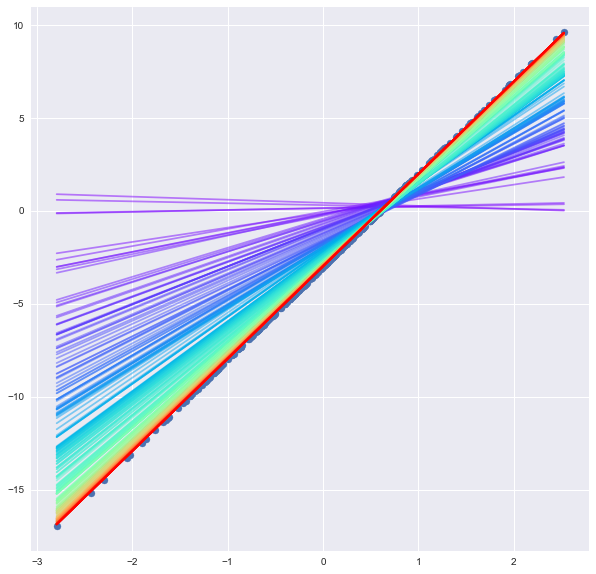

In [3]:
cmap = plt.get_cmap('rainbow', lut=N)
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x_data, y_data)                                     # y_data

x_range = np.array((x_data.min(), x_data.max()))               # for Visualization (두 점)

J_track = list()
w_track, b_track = list(), list()

for data_idx, (x,y) in enumerate(zip(x_data, y_data)):

    w_track.append(w)
    b_track.append(b)
    
    y_range = w*x_range + b
    ax.plot(x_range, y_range,color=cmap(data_idx), alpha= 0.5) # 두 점 잇는 직선
    
    # forward
    pred = x*w + b
    J = (y-pred)**2                                            # MSE LOSS
    J_track.append(J)
    
    # jacobians 
    dJ_dpred = -2 *(y-pred)                                    # Diff of MSE
    dpred_dw = x                  # one feature -> scalar 
    dpred_db = 1                  # one feature -> scalar                                              
    
    # backward
    dJ_dw = dJ_dpred * dpred_dw
    dJ_db = dJ_dpred * dpred_db
    
    # parameter update
    w = w - lr*dJ_dw
    b = b - lr*dJ_db
    
w,b

Text(0, 0.5, 'Weight and Bias')

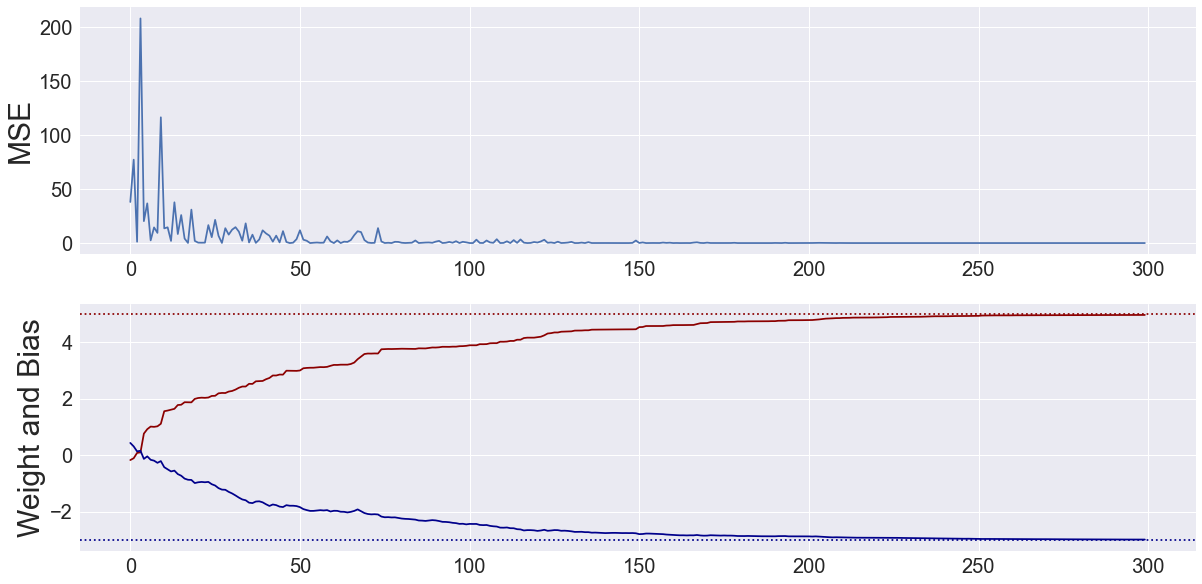

In [4]:
# Results
fig, axes = plt.subplots(2,1, figsize = (20,10))
axes[0].plot(J_track)
axes[1].plot(w_track, color='darkred')
axes[1].plot(b_track, color='darkblue')

axes[0].set_ylabel('MSE', fontsize = 30)
axes[0].tick_params(labelsize=20)

axes[1].axhline(y=t_w, color='darkred', linestyle=':')
axes[1].axhline(y=t_b, color='darkblue', linestyle=':')
axes[1].tick_params(labelsize=20)
axes[1].set_ylabel('Weight and Bias', fontsize = 30)